In [1]:
URL_SLIDES = 'https://davidkwast.github.io/slides/geodjango-postgis-drf'

import os
os.environ['DJANGO_SETTINGS_MODULE'] = 'restgis.settings'

import json

from IPython import display

import requests

import django
django.setup()

from django.conf import settings

# GeoDjango + PostGIS + DRF


---
---

## david.kwast@scicrop.com

### Technology Specialist @ https://SciCrop.com

---

## https://davidkwast.github.io/slides/geodjango-postgis-drf

## Código-fonte

---

### https://github.com/davidkwast/geodjango-postgis-drf

## Dependências

In [2]:
display.Code(filename='./Pipfile', language='toml')

[[source]]
name = "pypi"
url = "https://pypi.org/simple"
verify_ssl = true

[dev-packages]
jupyter = "*"
ipython = "*"

[packages]
django = "*"
psycopg2-binary = "*"
djangorestframework = "*"
numpy = "*"
gdal = "==2.2.3"
python-decouple = "*"
requests = "*"
rasterio = "*"

[requires]
python_version = "3.7"

\* Ubuntu 18.04

### GDAL
a translator library for raster and vector geospatial data formats 

#### Sistema Operacional

```console
foo@bar:~$ apt install gdal-bin libgdal-dev

foo@bar:~$ gdalinfo --version
GDAL 2.2.3, released 2017/11/20
```

#### Pip(Env)

```console
foo@bar:~$ pipenv install numpy

foo@bar:~$ export CPLUS_INCLUDE_PATH=/usr/include/gdal
foo@bar:~$ export C_INCLUDE_PATH=/usr/include/gdal
foo@bar:~$ pipenv install "gdal==2.2.3"
```

#### Python

```python
from osgeo import gdal; gdal.UseExceptions() # type: ignore
from osgeo import ogr; ogr.UseExceptions() # type: ignore
```

---

- https://gdal.org/python/
- https://gdal.org/about.html#what-is-gdal

### PostgreSQL + PostGIS


#### Python

```console
foo@bar:~$ pipenv install psycopg2-binary
```

#### SQL

```SQL
CREATE EXTENSION POSTGIS;
```

---

- https://pypi.org/project/psycopg2-binary/
  - The binary package is a practical choice for development and testing but in production it is advised to use the package built from sources.
- https://postgis.net/documentation/

### Django + GeoDjango + DRF

#### settings.py
```python
...
INSTALLED_APPS = [
    ...
    'django.contrib.gis',
    'rest_framework',
    ...
]
...
DATABASES = {
    'default': {
        'ENGINE': 'django.contrib.gis.db.backends.postgis',
        ...
    },
}
...
```

#### models.py
```python
from django.contrib.gis.db import models
```
---

- https://docs.djangoproject.com/en/2.2/ref/contrib/gis/

## Django

### shell
```console
foo@bar:~$ django-admin startproject restgis .

foo@bar:~$ mkdir restgis/geoapi

foo@bar:~$ python manage.py startapp geoapi restgis/geoapi
```

---
- https://docs.python-guide.org/writing/structure/#regarding-django-applications

```console

foo@bar:~$ ls -l restgis/
total 16
drwxrwxr-x 3 kwast kwast 4096 mai 24 16:40 geoapi
-rw-rw-r-- 1 kwast kwast    0 mai 24 16:37 __init__.py
-rw-rw-r-- 1 kwast kwast 3091 mai 24 16:37 settings.py
-rw-rw-r-- 1 kwast kwast  749 mai 24 16:37 urls.py
-rw-rw-r-- 1 kwast kwast  391 mai 24 16:37 wsgi.py

foo@bar:~$ ls -l restgis/geoapi/
total 24
-rw-rw-r-- 1 kwast kwast   63 mai 24 16:40 admin.py
-rw-rw-r-- 1 kwast kwast   87 mai 24 16:40 apps.py
-rw-rw-r-- 1 kwast kwast    0 mai 24 16:40 __init__.py
drwxrwxr-x 2 kwast kwast 4096 mai 24 16:40 migrations
-rw-rw-r-- 1 kwast kwast   57 mai 24 16:40 models.py
-rw-rw-r-- 1 kwast kwast   60 mai 24 16:40 tests.py
-rw-rw-r-- 1 kwast kwast   63 mai 24 16:40 views.py
```

In [3]:
settings.INSTALLED_APPS

['django.contrib.auth',
 'django.contrib.contenttypes',
 'django.contrib.staticfiles',
 'django.contrib.gis',
 'rest_framework',
 'restgis.geoapi']

```console
foo@bar:~$ python manage.py runserver
Watching for file changes with StatReloader
Performing system checks...

System check identified no issues (0 silenced).

May 25, 2019 - 02:29:36
Django version 2.2.1, using settings 'restgis.settings'
Starting development server at http://127.0.0.1:8000/
Quit the server with CONTROL-C.
```

In [4]:
HOST = 'http://127.0.0.1:8000'

In [5]:
requests.get(f'{HOST}/api/test').json()

{'data': 'OK'}

In [6]:
display.Code(filename='./restgis/geoapi/api/test_api.py')

from rest_framework.decorators import api_view
from rest_framework.response import Response

# urls.py: path('api/test', test_api.test_view)

@api_view(['GET'])
def test_view(request):
    return Response({'data': 'OK'})

In [7]:
display.Image(url=f'{URL_SLIDES}/img/shape_01.jpeg')

In [8]:
shape_raw = requests.get(f'{URL_SLIDES}/shapes/shape_01.geojson').text

shape_raw

'{\n"type": "FeatureCollection",\n"name": "shape_01",\n"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },\n"bbox": [ -48.6402438646664, -20.5393768147456, -48.5981384932181, -20.5085360970577 ],                                            \n"features": [\n{ "type": "Feature", "properties": { }, "bbox": [ -48.640243864666353, -20.539376814745559, -48.598138493218052, -20.508536097057721 ], "geometry": { "type": "Polygon", "coordinates": [ [ [ -48.613525653306546, -20.539376814745559 ], [ -48.599828357554578, -20.53250532378005 ], [ -48.599868341793368, -20.531094920705844 ], [ -48.598138493218052, -20.530224383908301 ], [ -48.603904136255373, -20.510849848246412 ], [ -48.611882887195065, -20.513973707861521 ], [ -48.618676458824758, -20.508536097057721 ], [ -48.631333790383366, -20.515961838296558 ], [ -48.640243864666353, -20.524046928396679 ], [ -48.628488307851818, -20.532668463505793 ], [ -48.620319645413332, -20.535536469294023 ], [ -48.61750706258

In [9]:
shape = json.loads(shape_raw)

shape

{'type': 'FeatureCollection',
 'name': 'shape_01',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'bbox': [-48.6402438646664,
  -20.5393768147456,
  -48.5981384932181,
  -20.5085360970577],
 'features': [{'type': 'Feature',
   'properties': {},
   'bbox': [-48.64024386466635,
    -20.53937681474556,
    -48.59813849321805,
    -20.50853609705772],
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-48.613525653306546, -20.53937681474556],
      [-48.59982835755458, -20.53250532378005],
      [-48.59986834179337, -20.531094920705844],
      [-48.59813849321805, -20.5302243839083],
      [-48.60390413625537, -20.510849848246412],
      [-48.611882887195065, -20.51397370786152],
      [-48.61867645882476, -20.50853609705772],
      [-48.631333790383366, -20.51596183829656],
      [-48.64024386466635, -20.52404692839668],
      [-48.62848830785182, -20.532668463505793],
      [-48.62031964541333, -20.535536469294023],
      [-48.61750706258083, 

In [10]:
shape_geometry = shape['features'][0]['geometry']

shape_geometry

{'type': 'Polygon',
 'coordinates': [[[-48.613525653306546, -20.53937681474556],
   [-48.59982835755458, -20.53250532378005],
   [-48.59986834179337, -20.531094920705844],
   [-48.59813849321805, -20.5302243839083],
   [-48.60390413625537, -20.510849848246412],
   [-48.611882887195065, -20.51397370786152],
   [-48.61867645882476, -20.50853609705772],
   [-48.631333790383366, -20.51596183829656],
   [-48.64024386466635, -20.52404692839668],
   [-48.62848830785182, -20.532668463505793],
   [-48.62031964541333, -20.535536469294023],
   [-48.61750706258083, -20.53609043087729],
   [-48.613525653306546, -20.53937681474556]]]}

## Obter o centróide de um polígono

In [11]:
requests.post(url=f'{HOST}/api/shape/centroid', json=shape_geometry).json()

{'type': 'Point', 'coordinates': [-48.61704533932971, -20.52394830288685]}

In [12]:
display.Code(filename='./restgis/geoapi/api/shape_centroid.py')

from rest_framework.decorators import api_view
from rest_framework.response import Response

import json
from osgeo import ogr; ogr.UseExceptions()

# urls.py: path('api/shape/centroid', shape_centroid.view)

@api_view(['POST'])
def view(request):
    
    input_str_geojson = request.body.decode('utf-8')
    
    ogr_geom = ogr.CreateGeometryFromJson(input_str_geojson)
    
    ogr_point = ogr_geom.Centroid()
    
    raw_json = ogr_point.ExportToJson()
    
    return Response(json.loads(raw_json))

In [13]:
display.Image(url=f'{URL_SLIDES}/img/satelite_01.jpeg')

## Cortar imagem de satélite

In [14]:
%%time
response = requests.post(
    url = f'{HOST}/api/shape/crop',
    json = shape_geometry,
    headers = {
        'Accept': 'image/png',
    }
)

CPU times: user 6.34 ms, sys: 0 ns, total: 6.34 ms
Wall time: 629 ms


In [15]:
response.headers['Content-Type']

'image/png'

In [16]:
response.content[:100]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xc5\x00\x00\x01L\x08\x06\x00\x00\x00\xba~\xa7\x94\x00\x00 \x00IDATx\x9c\xec\xbd\xe9\xb3e\xd7q\xdd\xf9\xcb\xdc\xfb\xdc\xfb\x86\x1a1\x90\x80(\xa0@\x88\xa4,[\xb2H\x0c\x04Q\x05\x80\x00\xe9n\xbb#\xda\x9f\xfa\xef\xecO\x1e$[\xad\x99\x83\x1cnKr\x87\xdbj'

In [17]:
len(response.content)

139182

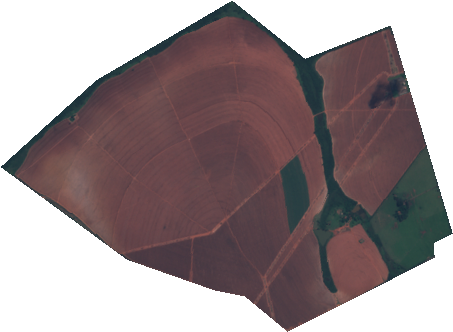

In [18]:
display.Image(data=response.content)

./restgis/geoapi/api/shape_crop.py

```python
from rest_framework.decorators import api_view
from rest_framework.response import Response

from django.conf import settings
import tempfile
import json
from pathlib import Path
import numpy as np
import rasterio
import rasterio.mask
from rasterio.vrt import WarpedVRT

# urls.py: path('api/shape/crop', shape_crop.view)

@api_view(['POST'])
def view(request):
```
...

...

```python
input_geojson = json.loads(request.body)

tci_rasterio = rasterio.open(settings.DEMO_IMAGE_SATELITE_FS_PATH)
tci_rasterio_dataset = WarpedVRT(tci_rasterio, crs='EPSG:4326')

tci_array, tci_affine = rasterio.mask.mask(
    tci_rasterio_dataset,
    [input_geojson],
    indexes = None,
    crop = True,
    all_touched = False,
    invert = False,
    nodata = 0, #np.nan,
    filled = True,
    pad = False,
)

tci_x_size, tci_y_size = tci_array.shape[2], tci_array.shape[1] # Z,Y,X
```
...

...

```python
with tempfile.TemporaryDirectory() as tmpdirname:

    tci_image_path = Path(tmpdirname).joinpath('tci.png')

    with rasterio.open(
        tci_image_path, 'w', driver='PNG',       
        dtype = 'uint8', count = 4,
        width = tci_x_size, height = tci_y_size,
        transform = tci_affine
    ) as tci_rast_fd:

        tci_rast_fd.write(tci_array[0], 1)
        tci_rast_fd.write(tci_array[1], 2)
        tci_rast_fd.write(tci_array[2], 3)
        tci_rast_fd.write(
            np.asarray(
                np.where(tci_array[0] > 0, 255, 0),
                dtype = np.uint8
            ),
            4
        )

    with open(tci_image_path ,'rb') as fd:
        payload = fd.read()

return Response(payload, content_type='image/png')
```

## Models

In [19]:
display.Code(filename='./restgis/geoapi/models.py')

from django.contrib.gis.db import models

class Point(models.Model):
    name = models.CharField(max_length=100, unique=True)
    geometry = models.PointField()

class Polygon(models.Model):
    name = models.CharField(max_length=100, unique=True)
    geometry = models.PolygonField()

---
- https://docs.djangoproject.com/en/2.2/ref/contrib/gis/model-api/

```console
foo@bar:~$ python manage.py makemigrations
Migrations for 'geoapi':
  restgis/geoapi/migrations/0001_initial.py
    - Create model Point
    - Create model Polygon

foo@bar:~$ python manage.py migrate
Operations to perform:
  Apply all migrations: auth, contenttypes, geoapi
Running migrations:
  Applying contenttypes.0001_initial... OK
  Applying contenttypes.0002_remove_content_type_name... OK
  Applying auth.0001_initial... OK
  Applying auth.0002_alter_permission_name_max_length... OK
  Applying auth.0003_alter_user_email_max_length... OK
  Applying auth.0004_alter_user_username_opts... OK
  Applying auth.0005_alter_user_last_login_null... OK
  Applying auth.0006_require_contenttypes_0002... OK
  Applying auth.0007_alter_validators_add_error_messages... OK
  Applying auth.0008_alter_user_username_max_length... OK
  Applying auth.0009_alter_user_last_name_max_length... OK
  Applying auth.0010_alter_group_name_max_length... OK
  Applying auth.0011_update_proxy_permissions... OK
  Applying geoapi.0001_initial... OK
```

```sql
--
-- Create model Point
--
CREATE TABLE "geoapi_point" (
    "id" serial NOT NULL PRIMARY KEY,
    "name" varchar(100) NOT NULL UNIQUE,
    "geometry" geometry(POINT,4326) NOT NULL
);
--
-- Create model Polygon
--
CREATE TABLE "geoapi_polygon" (
    "id" serial NOT NULL PRIMARY KEY,
    "name" varchar(100) NOT NULL UNIQUE,
    "geometry" geometry(POLYGON,4326) NOT NULL
);
--
--
CREATE INDEX "geoapi_point_name_c7d56075_like" ON "geoapi_point" ("name" varchar_pattern_ops);
CREATE INDEX "geoapi_point_geometry_id" ON "geoapi_point"USING GIST ("geometry");
CREATE INDEX "geoapi_polygon_name_d010f373_like" ON "geoapi_polygon" ("name" varchar_pattern_ops);
CREATE INDEX "geoapi_polygon_geometry_id" ON "geoapi_polygon"USING GIST ("geometry");
```

In [20]:
from restgis.geoapi import models
from django.contrib.gis import geos

In [21]:
models.Point.objects.all().delete()

(1, {'geoapi.Point': 1})

In [22]:
models.Polygon.objects.all().delete()

(1, {'geoapi.Polygon': 1})

In [23]:
centroid_dict = requests.post(url=f'{HOST}/api/shape/centroid', json=shape_geometry).json()
centroid_dict

{'type': 'Point', 'coordinates': [-48.61704533932971, -20.52394830288685]}

In [24]:
centroid_obj = models.Point.objects.create(
    name = 'centroid',
    geometry = geos.Point(centroid_dict['coordinates']),
)
centroid_obj

<Point: Point object (7)>

In [25]:
centroid_obj.name, centroid_obj.geometry

('centroid', <Point object at 0x7fbe5be223c8>)

In [26]:
centroid_obj.geometry.x

-48.61704533932971

In [27]:
centroid_obj.geometry.y

-20.52394830288685

In [28]:
shape_geometry

{'type': 'Polygon',
 'coordinates': [[[-48.613525653306546, -20.53937681474556],
   [-48.59982835755458, -20.53250532378005],
   [-48.59986834179337, -20.531094920705844],
   [-48.59813849321805, -20.5302243839083],
   [-48.60390413625537, -20.510849848246412],
   [-48.611882887195065, -20.51397370786152],
   [-48.61867645882476, -20.50853609705772],
   [-48.631333790383366, -20.51596183829656],
   [-48.64024386466635, -20.52404692839668],
   [-48.62848830785182, -20.532668463505793],
   [-48.62031964541333, -20.535536469294023],
   [-48.61750706258083, -20.53609043087729],
   [-48.613525653306546, -20.53937681474556]]]}

In [29]:
polygon_obj = models.Polygon.objects.create(
    name = 'shape',
    geometry = geos.Polygon(shape_geometry['coordinates'][0]),
)
polygon_obj

<Polygon: Polygon object (5)>

In [30]:
polygon_obj.geometry

In [31]:
polygon_obj.geometry.area

0.0007797729015204063

In [32]:
qs = models.Polygon.objects.filter(
    geometry__contains=centroid_obj.geometry
)

In [33]:
print(qs.query)

SELECT "geoapi_polygon"."id", "geoapi_polygon"."name", "geoapi_polygon"."geometry"::bytea FROM "geoapi_polygon" WHERE ST_Contains("geoapi_polygon"."geometry", ST_GeomFromEWKB('\001\001\000\000 \346\020\000\000\000IxW\373NH\300\230\261\331y!\2064\300'::bytea))


In [34]:
qs[0].name

'shape'

In [35]:
display.Image(url=f'{URL_SLIDES}/img/sql_01.png')